**Euclidean Distance using Ward as per Mentioned in the Literature Review & k-means**

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Cosine Similarity Matrix:
[[1.   0.36 0.4  0.46 0.37 0.34 0.38 0.32 0.39 0.26 0.29 0.34 0.46 0.32
  0.44]
 [0.36 1.   0.45 0.49 0.4  0.35 0.51 0.46 0.52 0.42 0.61 0.43 0.48 0.48
  0.35]
 [0.4  0.45 1.   0.44 0.41 0.42 0.34 0.55 0.53 0.52 0.39 0.41 0.63 0.52
  0.62]
 [0.46 0.49 0.44 1.   0.46 0.48 0.46 0.42 0.46 0.4  0.32 0.46 0.55 0.49
  0.45]
 [0.37 0.4  0.41 0.46 1.   0.35 0.44 0.39 0.31 0.28 0.49 0.46 0.5  0.61
  0.4 ]
 [0.34 0.35 0.42 0.48 0.35 1.   0.32 0.45 0.53 0.37 0.29 0.45 0.38 0.52
  0.55]
 [0.38 0.51 0.34 0.46 0.44 0.32 1.   0.45 0.29 0.26 0.44 0.5  0.28 0.58
  0.26]
 [0.32 0.46 0.55 0.42 0.39 0.45 0.45 1.   0.54 0.69 0.43 0.44 0.44 0.49
  0.48]
 [0.39 0.52 0.53 0.46 0.31 0.53 0.29 0.54 1.   0.54 0.48 0.32 0.52 0.35
  0.56]
 [0.26 0.42 0.52 0.4  0.28 0.37 0.26 0.69 0.54 1.   0.35 0.36 0.47 0.3
  0.55]
 [0.29 0.61 0.39 0.32 0.49 0.29 0.44 0.43 0.48 0.35 1.   0.37 0.44 0.51
  0.43]
 [0.34 0.43 0.41 0.46 0.46 0.45 0.5  0.44 0.32 0.36 0.37 1.   0.46 0.59
  0.44]
 [0.46 0.48 0.6

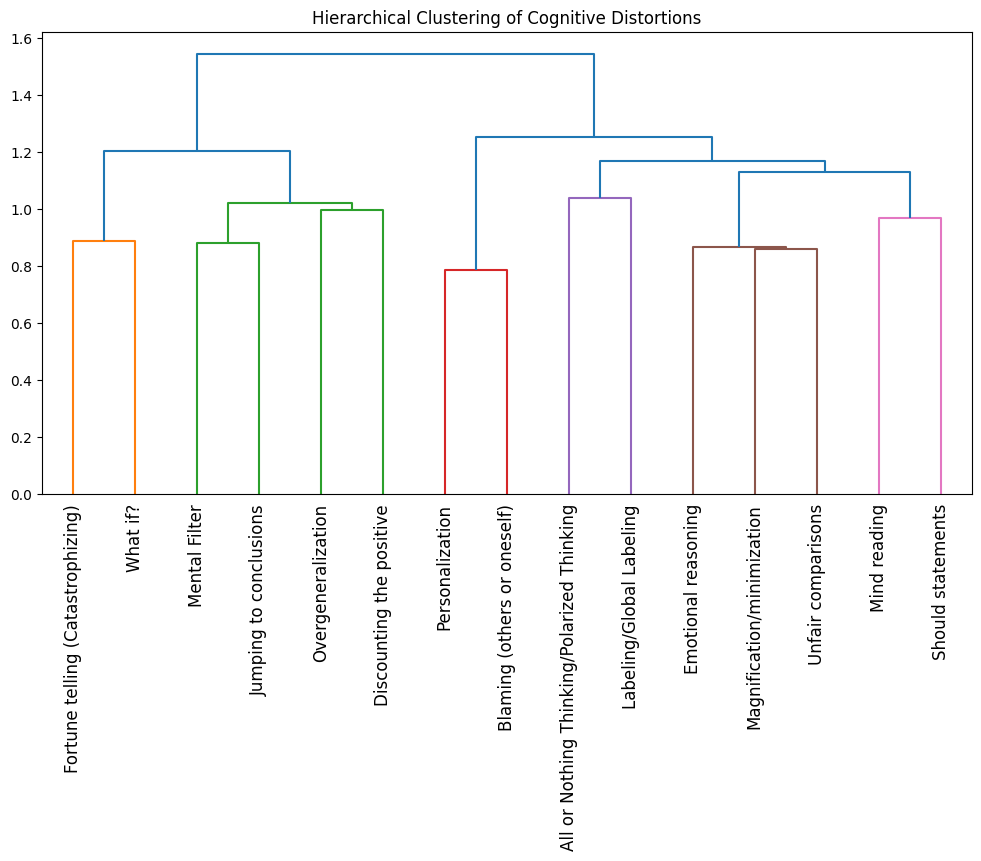


Clusters:
Cluster 0: ['Emotional reasoning', 'Mind reading', 'Should statements', 'Magnification/minimization', 'Unfair comparisons']
Cluster 1: ['Labeling/Global Labeling', 'Mental Filter', 'Overgeneralization', 'Discounting the positive', 'Jumping to conclusions']
Cluster 2: ['Fortune telling (Catastrophizing)', 'What if?']
Cluster 3: ['All or Nothing Thinking/Polarized Thinking']
Cluster 4: ['Personalization', 'Blaming (others or oneself)']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# List of Cognitive Distortions with Descriptions
cognitive_distortions = {
    "All or Nothing Thinking/Polarized Thinking": "I see things in black and white categories. If my performance falls short of perfect, I see myself as a total failure, neglecting any middle ground or nuance.",
    "Fortune telling (Catastrophizing)": "I anticipate the worst possible outcome to situations as a foregone conclusion, often fearing that these outcomes will be so terrible that they will be unbearable.",
    "Emotional reasoning": "I base my view of situations or myself on the way I feel. For example, if I feel incompetent, I believe I am incompetent, equating feelings with facts.",
    "Labeling/Global Labeling": "I generalize one or two qualities into a negative global judgment, often using extreme language. For instance, if I make a mistake, I may label myself 'a loser' rather than seeing the error as a single, isolated incident.",
    "Mental Filter": "I pick out a single negative detail and dwell on it exclusively, so that my vision of all reality becomes darkened, like the drop of ink that discolors a whole beaker of water.",
    "Mind reading": "I assume that I know what others are thinking without having sufficient evidence of their thoughts. I often believe that others are negatively evaluating me or have hostile intentions.",
    "Overgeneralization": "I view a single negative event as a never-ending pattern of defeat by using words such as 'always' or 'never' when thinking about it.",
    "Personalization": "I see myself as the cause of some negative external event, which in reality I was not primarily responsible for, often leading to undue guilt and frustration.",
    "Should statements": "I have a precise, fixed idea of how I or others should behave, and I overestimate how bad it is that these expectations are not met, leading to feelings of anger, frustration, and resentment.",
    "Blaming (others or oneself)": "I hold others responsible for my pain, or alternatively, I blame myself for every problem or misfortune, ignoring reasonable explanations for events.",
    "What if?": "I continuously worry about what the future holds, imagining and fretting over negative scenarios and their potential disastrous effects on my life.",
    "Discounting the positive": "I reject positive experiences by insisting they 'don't count.' For instance, if I do something well, I may dismiss it as merely luck or a fluke, maintaining a negative belief that is contradicted by my everyday experiences.",
    "Magnification/minimization": "I exaggerate the importance of my problems and shortcomings, or I minimize the importance of my desirable qualities, often leading to a distorted view of reality.",
    "Jumping to conclusions": "I make negative interpretations without actual evidence. I can take the form of 'mind reading' or 'predicting the future' and usually cast my experiences in a negative light.",
    "Unfair comparisons": "I focus on others' strengths and my weaknesses, viewing myself unfavorably compared to others, which often leads to feelings of inadequacy and lowered self-esteem."
}

# Encode each distortion using Sentence-BERT
descriptions = list(cognitive_distortions.values())  # Extract descriptions
distortion_names = list(cognitive_distortions.keys())  # Extract names
vectors = model.encode(descriptions)  # Convert to numerical vectors

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(vectors)

# Print similarity matrix
print("Cosine Similarity Matrix:")
np.set_printoptions(precision=2, suppress=True)
print(similarity_matrix)

# ===================
# Hierarchical Clustering (Dendrogram)
# ===================
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(vectors, method='ward'), labels=distortion_names)
plt.xticks(rotation=90)
plt.title("Hierarchical Clustering of Cognitive Distortions")
plt.show()

# ===================
# K-Means Clustering
# ===================
num_clusters = 5  # Change this number if needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(vectors)

# Organizing and printing clusters
clusters = {i: [] for i in range(num_clusters)}
for distortion, label in zip(distortion_names, labels):
    clusters[label].append(distortion)

print("\nClusters:")
for cluster, distortions in clusters.items():
    print(f"Cluster {cluster}: {distortions}")


**Cosine Similarity with TF-IDF**

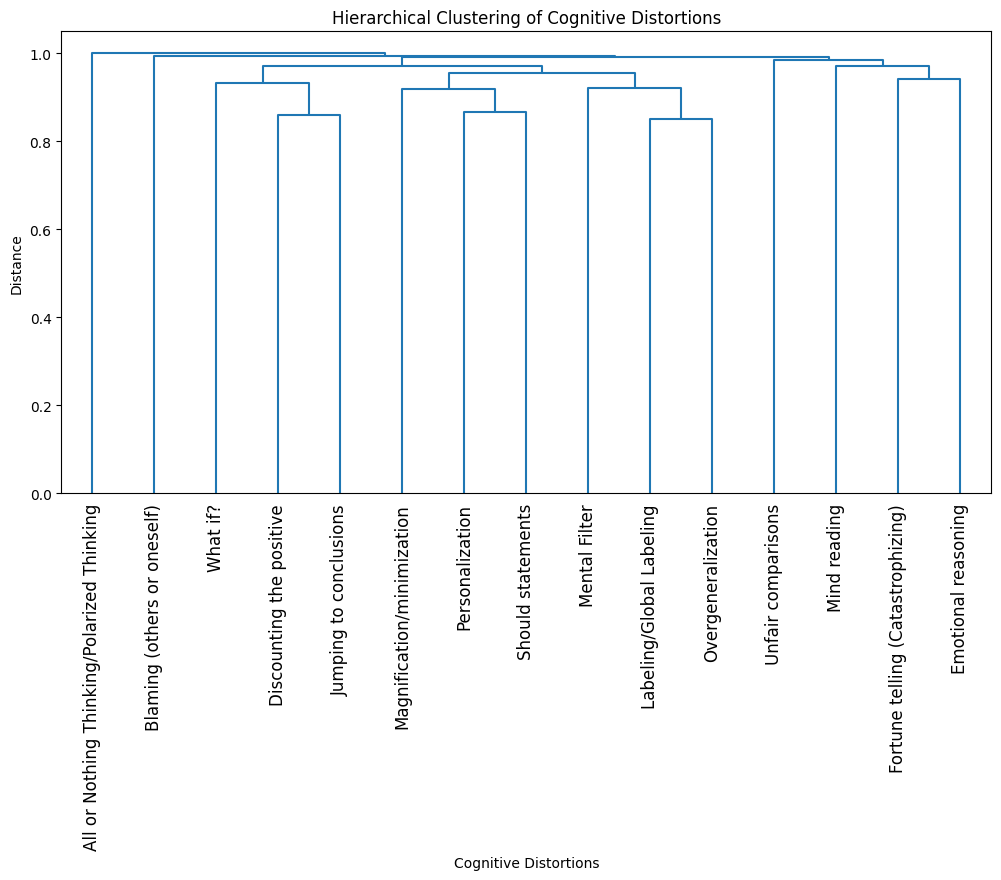


📌 Cognitive Distortion Categories from Clustering:
Cluster 5: All or Nothing Thinking/Polarized Thinking
Cluster 2: Fortune telling (Catastrophizing), Emotional reasoning, Mind reading
Cluster 1: Labeling/Global Labeling, Mental Filter, Overgeneralization, Personalization, Should statements, What if?, Discounting the positive, Magnification/minimization, Jumping to conclusions
Cluster 4: Blaming (others or oneself)
Cluster 3: Unfair comparisons


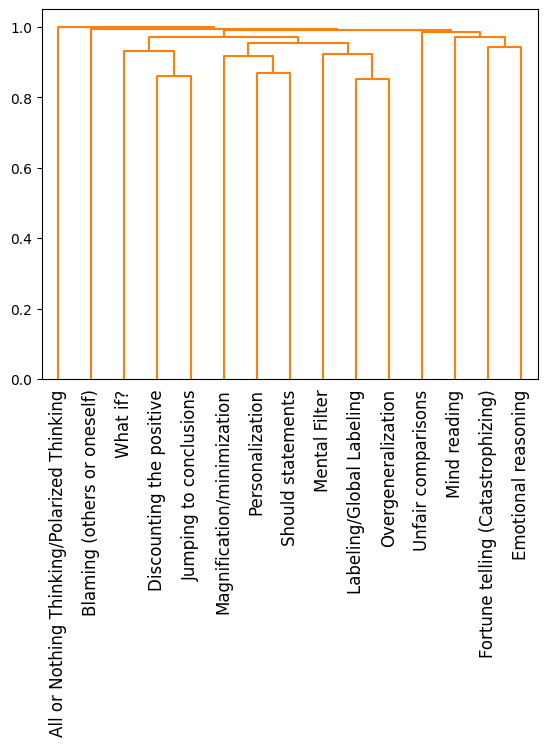

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Define Cognitive Distortion Descriptions
distortion_definitions = {
    "All or Nothing Thinking/Polarized Thinking": "I see things in black and white categories. If my performance falls short of perfect, I see myself as a total failure, neglecting any middle ground or nuance.",
    "Fortune telling (Catastrophizing)": "I anticipate the worst possible outcome to situations as a foregone conclusion, often fearing that these outcomes will be so terrible that they will be unbearable.",
    "Emotional reasoning": "I base my view of situations or myself on the way I feel. For example, if I feel incompetent, I believe I am incompetent, equating feelings with facts.",
    "Labeling/Global Labeling": "I generalize one or two qualities into a negative global judgment, often using extreme language. For instance, if I make a mistake, I may label myself 'a loser' rather than seeing the error as a single, isolated incident.",
    "Mental Filter": "I pick out a single negative detail and dwell on it exclusively, so that my vision of all reality becomes darkened, like the drop of ink that discolors a whole beaker of water.",
    "Mind reading": "I assume that I know what others are thinking without having sufficient evidence of their thoughts. I often believe that others are negatively evaluating me or have hostile intentions.",
    "Overgeneralization": "I view a single negative event as a never-ending pattern of defeat by using words such as 'always' or 'never' when thinking about it.",
    "Personalization": "I see myself as the cause of some negative external event, which in reality I was not primarily responsible for, often leading to undue guilt and frustration.",
    "Should statements": "I have a precise, fixed idea of how I or others should behave, and I overestimate how bad it is that these expectations are not met, leading to feelings of anger, frustration, and resentment.",
    "Blaming (others or oneself)": "I hold others responsible for my pain, or alternatively, I blame myself for every problem or misfortune, ignoring reasonable explanations for events.",
    "What if?": "I continuously worry about what the future holds, imagining and fretting over negative scenarios and their potential disastrous effects on my life.",
    "Discounting the positive": "I reject positive experiences by insisting they 'don't count.' For instance, if I do something well, I may dismiss it as merely luck or a fluke, maintaining a negative belief that is contradicted by my everyday experiences.",
    "Magnification/minimization": "I exaggerate the importance of my problems and shortcomings, or I minimize the importance of my desirable qualities, often leading to a distorted view of reality.",
    "Jumping to conclusions": "I make negative interpretations without actual evidence. I can take the form of 'mind reading' or 'predicting the future' and usually cast my experiences in a negative light.",
    "Unfair comparisons": "I focus on others' strengths and my weaknesses, viewing myself unfavorably compared to others, which often leads to feelings of inadequacy and lowered self-esteem."
}

# Convert Text Definitions into Vectors (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(distortion_definitions.values())


# Compute Cosine Similarity Matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_dist = 1 - cosine_sim_matrix
np.fill_diagonal(cosine_dist, 0)  # ensure zero diagonal
condensed = squareform(cosine_dist)

linkage_matrix = sch.linkage(condensed, method="average")

# Perform Hierarchical Clustering
#linkage_matrix = sch.linkage(vectors, method="ward")


# Visualize the Hierarchical Clustering as a Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=list(distortion_definitions.keys()), leaf_rotation=90)
plt.title("Hierarchical Clustering of Cognitive Distortions")
plt.xlabel("Cognitive Distortions")
plt.ylabel("Distance")
plt.show()
dendrogram = sch.dendrogram(
    linkage_matrix, 
    labels=list(distortion_definitions.keys()), 
    leaf_rotation=90, 
    color_threshold=5.0  # example value, adjust based on your data
)

# Convert Clusters into Decision Tree Nodes
from scipy.cluster.hierarchy import fcluster

# Set a threshold to extract clusters
num_clusters = 5  # Adjust based on how broad you want categories to be
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Assign Distortions to Hierarchical Levels
cluster_dict = {}
for i, (distortion, cluster) in enumerate(zip(distortion_definitions.keys(), clusters)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(distortion)

# Print hierarchical categories
print("\n📌 Cognitive Distortion Categories from Clustering:")
for cluster_id, distortions in cluster_dict.items():
    print(f"Cluster {cluster_id}: {', '.join(distortions)}")

****

**Semantic Embeddings**

In [14]:
pip install sentence-transformers scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [16]:
# Example data
distortions = {
     "All or Nothing Thifrom sentence_transformers import SentenceTransformer

# Load a pre-trained model (miniLM is lightweight and decent)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode each definition into a vector
embeddings = model.encode(definitions, show_progress_bar=True)
nking/Polarized Thinking": "I see things in black and white categories. If my performance falls short of perfect, I see myself as a total failure, neglecting any middle ground or nuance.",
    "Fortune telling (Catastrophizing)": "I anticipate the worst possible outcome to situations as a foregone conclusion, often fearing that these outcomes will be so terrible that they will be unbearable.",
    "Emotional reasoning": "I base my view of situations or myself on the way I feel. For example, if I feel incompetent, I believe I am incompetent, equating feelings with facts.",
    "Labeling/Global Labeling": "I generalize one or two qualities into a negative global judgment, often using extreme language. For instance, if I make a mistake, I may label myself 'a loser' rather than seeing the error as a single, isolated incident.",
    "Mental Filter": "I pick out a single negative detail and dwell on it exclusively, so that my vision of all reality becomes darkened, like the drop of ink that discolors a whole beaker of water.",
    "Mind reading": "I assume that I know what others are thinking without having sufficient evidence of their thoughts. I often believe that others are negatively evaluating me or have hostile intentions.",
    "Overgeneralization": "I view a single negative event as a never-ending pattern of defeat by using words such as 'always' or 'never' when thinking about it.",
    "Personalization": "I see myself as the cause of some negative external event, which in reality I was not primarily responsible for, often leading to undue guilt and frustration.",
    "Should statements": "I have a precise, fixed idea of how I or others should behave, and I overestimate how bad it is that these expectations are not met, leading to feelings of anger, frustration, and resentment.",
    "Blaming (others or oneself)": "I hold others responsible for my pain, or alternatively, I blame myself for every problem or misfortune, ignoring reasonable explanations for events.",
    "What if?": "I continuously worry about what the future holds, imagining and fretting over negative scenarios and their potential disastrous effects on my life.",
    "Discounting the positive": "I reject positive experiences by insisting they 'don't count.' For instance, if I do something well, I may dismiss it as merely luck or a fluke, maintaining a negative belief that is contradicted by my everyday experiences.",
    "Magnification/minimization": "I exaggerate the importance of my problems and shortcomings, or I minimize the importance of my desirable qualities, often leading to a distorted view of reality.",
    "Jumping to conclusions": "I make negative interpretations without actual evidence. I can take the form of 'mind reading' or 'predicting the future' and usually cast my experiences in a negative light.",
    "Unfair comparisons": "I focus on others' strengths and my weaknesses, viewing myself unfavorably compared to others, which often leads to feelings of inadequacy and lowered self-esteem."
}

titles = list(distortions.keys())
definitions = list(distortions.values())


In [17]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained model (miniLM is lightweight and decent)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode each definition into a vector
embeddings = model.encode(definitions, show_progress_bar=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Specify how many clusters you want, or use None and define a distance threshold
num_clusters = 5

cluster_model = AgglomerativeClustering(
    n_clusters=num_clusters, 
    affinity='cosine', 
    linkage='average'
)

labels = cluster_model.fit_predict(embeddings)
clusters = {}
for label, title in zip(labels, titles):
    clusters.setdefault(label, []).append(title)

# Print cluster assignments
for c_id, distortion_titles in clusters.items():
    print(f"Cluster {c_id}:")
    for dt in distortion_titles:
        print(f"  - {dt}")


Cluster 3:
  - All or Nothing Thinking/Polarized Thinking
Cluster 4:
  - Fortune telling (Catastrophizing)
  - What if?
Cluster 1:
  - Emotional reasoning
  - Personalization
  - Should statements
  - Blaming (others or oneself)
  - Magnification/minimization
  - Unfair comparisons
Cluster 0:
  - Labeling/Global Labeling
  - Mind reading
Cluster 2:
  - Mental Filter
  - Overgeneralization
  - Discounting the positive
  - Jumping to conclusions


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


CHATPSY


In [4]:
decision_tree = {
    "Rigid Thinking Patterns": {
        "All-or-Nothing Thinking": None,
        "Fortune Telling": None,
        "Emotional Reasoning": None,
        "What If? Thinking": None,
    },
    "Self & Other Judgments": {
        "Labeling": None,
        "Mental Filter": None,
        "Overgeneralization": None,
        "Blaming": None,
        "Discounting the Positive": None,
    },
    "Social Interpretation Errors": {
        "Mind Reading": None,
        "Jumping to Conclusions": None,
    },
    "Magnification & Comparison Distortions": {
        "Magnification/Minimization": None,
        "Unfair Comparisons": None,
    },
    "Self-Focused Expectations": {
        "Personalization": None,
        "Should Statements": None,
    }
}

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define cognitive distortions with short descriptions for classification
distortion_definitions = {
    "All-or-Nothing Thinking": "Extreme, black-and-white thinking.",
    "Fortune Telling": "Predicting a negative future.",
    "Emotional Reasoning": "Believing feelings reflect reality.",
    "What If? Thinking": "Repeated hypothetical questions.",
    "Labeling": "Assigning global, negative labels.",
    "Mental Filter": "Focusing only on negative details.",
    "Overgeneralization": "Turning one bad event into a pattern.",
    "Blaming": "Holding others or self responsible unfairly.",
    "Discounting the Positive": "Ignoring or rejecting positive events.",
    "Mind Reading": "Assuming others' thoughts without evidence.",
    "Jumping to Conclusions": "Making assumptions without proof.",
    "Magnification/Minimization": "Exaggerating negatives, downplaying positives.",
    "Unfair Comparisons": "Comparing yourself unfairly to others.",
    "Personalization": "Taking things too personally.",
    "Should Statements": "Rigid expectations about how things ‘should’ be."
}

# Train TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(distortion_definitions.values())

# Function to classify new thoughts
def classify_thought(thought):
    thought_vector = vectorizer.transform([thought])
    similarities = cosine_similarity(thought_vector, tfidf_matrix)[0]
    
    # Find highest similarity score
    highest_index = similarities.argmax()
    highest_distortion = list(distortion_definitions.keys())[highest_index]
    
    return highest_distortion

# Example test cases
thoughts = [
    "I always fail at everything.",  # All-or-Nothing Thinking
    "I just know they are laughing at me.",  # Mind Reading
    "What if I embarrass myself?",  # What If? Thinking
    "I should never make mistakes.",  # Should Statements
]

for thought in thoughts:
    print(f"Thought: {thought}\nDetected Distortion: {classify_thought(thought)}\n")

Thought: I always fail at everything.
Detected Distortion: All-or-Nothing Thinking

Thought: I just know they are laughing at me.
Detected Distortion: All-or-Nothing Thinking

Thought: What if I embarrass myself?
Detected Distortion: All-or-Nothing Thinking

Thought: I should never make mistakes.
Detected Distortion: All-or-Nothing Thinking



In [6]:
def classify_thought_probabilistic(thought, top_n=3):
    thought_vector = vectorizer.transform([thought])
    similarities = cosine_similarity(thought_vector, tfidf_matrix)[0]
    
    # Get top N distortions
    top_indices = similarities.argsort()[-top_n:][::-1]
    results = {list(distortion_definitions.keys())[i]: round(similarities[i], 2) for i in top_indices}
    
    return results

# Example
thought = "I always make mistakes and that means I’m a failure."
print(classify_thought_probabilistic(thought))

{'Should Statements': 0.0, 'Personalization': 0.0, 'Unfair Comparisons': 0.0}


optional

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Sample training data (X: TF-IDF vectors, y: Cognitive distortion labels)
X = tfidf_matrix.toarray()  # Convert sparse matrix to dense
y = list(distortion_definitions.keys())

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [8]:
thought_vector = vectorizer.transform(["I always fail."]).toarray()
predicted_distortion = clf.predict(thought_vector)
print(predicted_distortion)

['Overgeneralization']


Pre Trained BERT

In [9]:
pip install sentence-transformers scipy seaborn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load a pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight but powerful

# Define cognitive distortions and their descriptions
distortion_definitions = {
    "All or Nothing Thinking/Polarized Thinking": "I see things in black and white categories. If my performance falls short of perfect, I see myself as a total failure, neglecting any middle ground or nuance.",
    "Fortune telling (Catastrophizing)": "I anticipate the worst possible outcome to situations as a foregone conclusion, often fearing that these outcomes will be so terrible that they will be unbearable.",
    "Emotional reasoning": "I base my view of situations or myself on the way I feel. For example, if I feel incompetent, I believe I am incompetent, equating feelings with facts.",
    "Labeling/Global Labeling": "I generalize one or two qualities into a negative global judgment, often using extreme language. For instance, if I make a mistake, I may label myself 'a loser' rather than seeing the error as a single, isolated incident.",
    "Mental Filter": "I pick out a single negative detail and dwell on it exclusively, so that my vision of all reality becomes darkened, like the drop of ink that discolors a whole beaker of water.",
    "Mind reading": "I assume that I know what others are thinking without having sufficient evidence of their thoughts. I often believe that others are negatively evaluating me or have hostile intentions.",
    "Overgeneralization": "I view a single negative event as a never-ending pattern of defeat by using words such as 'always' or 'never' when thinking about it.",
    "Personalization": "I see myself as the cause of some negative external event, which in reality I was not primarily responsible for, often leading to undue guilt and frustration.",
    "Should statements": "I have a precise, fixed idea of how I or others should behave, and I overestimate how bad it is that these expectations are not met, leading to feelings of anger, frustration, and resentment.",
    "Blaming (others or oneself)": "I hold others responsible for my pain, or alternatively, I blame myself for every problem or misfortune, ignoring reasonable explanations for events.",
    "What if?": "I continuously worry about what the future holds, imagining and fretting over negative scenarios and their potential disastrous effects on my life.",
    "Discounting the positive": "I reject positive experiences by insisting they 'don't count.' For instance, if I do something well, I may dismiss it as merely luck or a fluke, maintaining a negative belief that is contradicted by my everyday experiences.",
    "Magnification/minimization": "I exaggerate the importance of my problems and shortcomings, or I minimize the importance of my desirable qualities, often leading to a distorted view of reality.",
    "Jumping to conclusions": "I make negative interpretations without actual evidence. I can take the form of 'mind reading' or 'predicting the future' and usually cast my experiences in a negative light.",
    "Unfair comparisons": "I focus on others' strengths and my weaknesses, viewing myself unfavorably compared to others, which often leads to feelings of inadequacy and lowered self-esteem."
}

# Generate BERT embeddings for each distortion definition
distortion_names = list(distortion_definitions.keys())
distortion_sentences = list(distortion_definitions.values())
bert_embeddings = model.encode(distortion_sentences)  # Convert text to high-dimensional vectors

# Compute cosine similarity matrix for BERT embeddings
cosine_sim_matrix = cosine_similarity(bert_embeddings, bert_embeddings)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

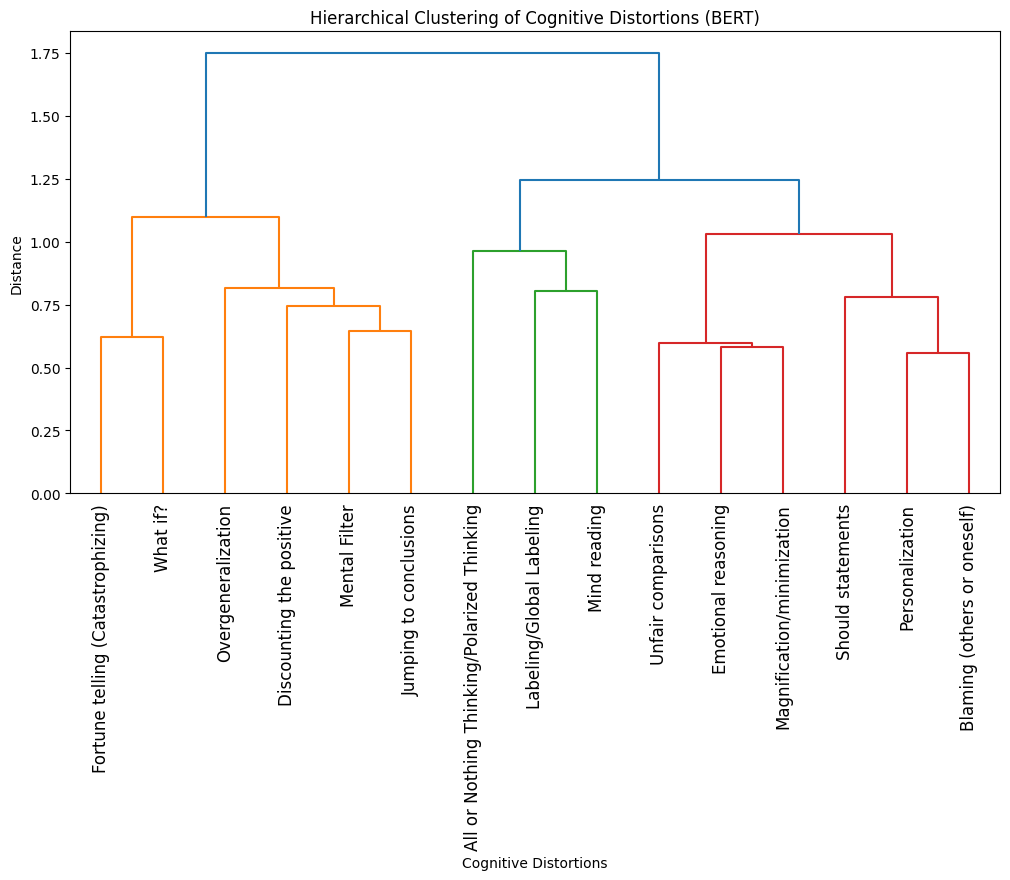

In [11]:
# Perform hierarchical clustering using Ward's method
linkage_matrix = sch.linkage(1 - cosine_sim_matrix, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=distortion_names, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cognitive Distortions (BERT)")
plt.xlabel("Cognitive Distortions")
plt.ylabel("Distance")
plt.show()

In [12]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters
num_clusters = 5  # You can adjust based on the dendrogram

# Extract clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Group distortions by clusters
cluster_dict = {}
for i, (distortion, cluster) in enumerate(zip(distortion_names, clusters)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(distortion)

# Print out the refined clusters
print("\n📌 Cognitive Distortion Categories from BERT Clustering:")
for cluster_id, distortions in cluster_dict.items():
    print(f"Cluster {cluster_id}: {', '.join(distortions)}")


📌 Cognitive Distortion Categories from BERT Clustering:
Cluster 3: All or Nothing Thinking/Polarized Thinking, Labeling/Global Labeling, Mind reading
Cluster 1: Fortune telling (Catastrophizing), What if?
Cluster 4: Emotional reasoning, Magnification/minimization, Unfair comparisons
Cluster 2: Mental Filter, Overgeneralization, Discounting the positive, Jumping to conclusions
Cluster 5: Personalization, Should statements, Blaming (others or oneself)


In [13]:
def classify_thought_with_bert(thought, top_n=5):
    # Convert thought into BERT embedding
    thought_embedding = model.encode([thought])
    
    # Compute similarity with all cognitive distortions
    similarities = cosine_similarity(thought_embedding, bert_embeddings)[0]
    
    # Get top N distortions with highest similarity
    top_indices = similarities.argsort()[-top_n:][::-1]
    results = {distortion_names[i]: round(similarities[i], 2) for i in top_indices}
    
    return results

# Example usage
thought = "She is the reason I did not perform well today."
print(classify_thought_with_bert(thought))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'Magnification/minimization': 0.27, 'All or Nothing Thinking/Polarized Thinking': 0.26, 'Unfair comparisons': 0.22, 'Personalization': 0.22, 'Discounting the positive': 0.19}
